In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

## 1. Data Cleaning

### 1.1 Load Data (loans.xlsx) into Memory
The dataset is a random sample of the Kaggle dataset: https://www.kaggle.com/wendykan/lending-club-loan-data/data.
Some limited documentation are available on the webpage if you click "loan.csv" on the left, then click "Column MetaData". The meanings of some columns can be found by Google. For example "dti" means debit to income ratio.

In [351]:
import os
import pandas as pd
os.chdir("C:/Users/Karpagam/Documents/Python Scripts")
df=pd.read_csv('loans.csv')
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq
0,6000,6000,36 months,6.99,185.24,A,A3,OWN,50000.0,Not Verified,...,7,0,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0
1,15000,15000,36 months,15.41,523.00,D,D1,RENT,58000.0,Verified,...,16,0,0.0,41.0,1,INDIVIDUAL,NaN,NaN,NaN,0
2,6000,6000,36 months,12.99,202.14,C,C1,RENT,52700.0,Not Verified,...,20,0,0.0,26.0,1,INDIVIDUAL,NaN,NaN,NaN,0
3,20000,20000,36 months,14.65,689.89,C,C5,RENT,77500.0,Verified,...,25,2,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0
4,35000,35000,36 months,13.98,1195.88,C,C3,MORTGAGE,87000.0,Source Verified,...,9,0,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0


1.2.1 Drop all columns for which more than 10% of values are missing
Using such attributes may lead to bias, unless appropriate imputation is applied on the missing values

In [352]:
#Checking observations and missing values
dff=[]
s1=pd.DataFrame(df.isnull().sum(),columns=["Missing"])
s2=pd.DataFrame(df.count(),columns=["Observations"])
f=pd.concat([s1,s2],axis=1)
dff.append(f)
dff

[                             Missing  Observations
 loan_amnt                          0         20000
 funded_amnt                        0         20000
 term                               0         20000
 int_rate                         100         19900
 installment                        0         20000
 grade                              0         20000
 sub_grade                          0         20000
 home_ownership                     0         20000
 annual_inc                         0         20000
 verification_status                0         20000
 issue_d                            0         20000
 loan_status                        0         20000
 pymnt_plan                         0         20000
 addr_state                         0         20000
 dti                                0         20000
 delinq_2yrs                        0         20000
 earliest_cr_line                   0         20000
 inq_last_6mths                     0         20000
 open_acc   

In [354]:
df1=pd.DataFrame()
df1=df
dflen=len(df1.columns)
keep_col=pd.DataFrame()
df2=pd.DataFrame()

for  i in range(0,dflen):

        a=df1.iloc[:,i].isnull().sum()
        b=df1.iloc[:,i].count()
        if((10*(b))/100<a):
            print ("Deleted column:",df1.columns[i])
        else:
            keep_col=pd.DataFrame(df1.iloc[:,i])
            df2=pd.concat([df2,keep_col],axis=1)
            
        
                

Deleted column: mths_since_last_major_derog
Deleted column: annual_inc_joint
Deleted column: dti_joint
Deleted column: verification_status_joint


In [361]:
df2.head()


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,6000,6000,36 months,6.99,185.24,A,A3,OWN,50000.0,Not Verified,...,25.06,0,Nov-1998,0,7,0,0.0,1,INDIVIDUAL,0
1,15000,15000,36 months,15.41,523.00,D,D1,RENT,58000.0,Verified,...,22.99,0,Sep-1998,0,16,0,0.0,1,INDIVIDUAL,0
2,6000,6000,36 months,12.99,202.14,C,C1,RENT,52700.0,Not Verified,...,21.16,0,Aug-1990,0,20,0,0.0,1,INDIVIDUAL,0
3,20000,20000,36 months,14.65,689.89,C,C5,RENT,77500.0,Verified,...,29.67,0,Dec-1992,1,25,2,0.0,1,INDIVIDUAL,0
4,35000,35000,36 months,13.98,1195.88,C,C3,MORTGAGE,87000.0,Source Verified,...,22.33,1,May-1988,0,9,0,0.0,1,INDIVIDUAL,0


1.2.2 Dropping all columns with only one value (missing value does not count)
Such attributes have no variation and are not informative at all

In [356]:
cols = list(df2)
nunique = df2.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df3=df2.drop(cols_to_drop, axis=1)


cols_to_drop

Index(['pymnt_plan', 'policy_code'], dtype='object')

In [359]:
df3.head()


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,collections_12_mths_ex_med,application_type,acc_now_delinq
0,6000,6000,36 months,6.99,185.24,A,A3,OWN,50000.0,Not Verified,...,AL,25.06,0,Nov-1998,0,7,0,0.0,INDIVIDUAL,0
1,15000,15000,36 months,15.41,523.00,D,D1,RENT,58000.0,Verified,...,NV,22.99,0,Sep-1998,0,16,0,0.0,INDIVIDUAL,0
2,6000,6000,36 months,12.99,202.14,C,C1,RENT,52700.0,Not Verified,...,CA,21.16,0,Aug-1990,0,20,0,0.0,INDIVIDUAL,0
3,20000,20000,36 months,14.65,689.89,C,C5,RENT,77500.0,Verified,...,VA,29.67,0,Dec-1992,1,25,2,0.0,INDIVIDUAL,0
4,35000,35000,36 months,13.98,1195.88,C,C3,MORTGAGE,87000.0,Source Verified,...,CA,22.33,1,May-1988,0,9,0,0.0,INDIVIDUAL,0


1.2.3 Dropping all columns for which more than 98% of observations has the same value (missing value does not count)
Such attributes may lead to singularity issue if used, as they are close to a constant. The cutoff 98% is a bit arbitrary.

In [366]:
df4=df3
df4len=len(df4.columns)
df5=pd.DataFrame()
for i in range(0,df4len):
    a=df4.ix[:,i].value_counts().max()
    b=df4.ix[:,i].count()
    if(a/b >0.98):
           print("Deleted column",df.columns[i])
    else:
            keep_col=pd.DataFrame(df4.iloc[:,i])
            df5=pd.concat([df5,keep_col],axis=1)
         
      

Deleted column: collections_12_mths_ex_med
Deleted column: application_type
Deleted column: acc_now_delinq


In [8]:
 df5.head() 

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
0,6000,6000,36 months,6.99,185.24,A,A3,OWN,50000.0,Not Verified,Jan-2015,Current,AL,25.06,0,Nov-1998,0,7,0
1,15000,15000,36 months,15.41,523.00,D,D1,RENT,58000.0,Verified,Nov-2015,Current,NV,22.99,0,Sep-1998,0,16,0
2,6000,6000,36 months,12.99,202.14,C,C1,RENT,52700.0,Not Verified,Sep-2014,In Grace Period,CA,21.16,0,Aug-1990,0,20,0
3,20000,20000,36 months,14.65,689.89,C,C5,RENT,77500.0,Verified,Feb-2015,Current,VA,29.67,0,Dec-1992,1,25,2
4,35000,35000,36 months,13.98,1195.88,C,C3,MORTGAGE,87000.0,Source Verified,Jul-2014,Current,CA,22.33,1,May-1988,0,9,0


In [9]:
# Now print out the column index of the dataset
df5.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec'],
      dtype='object')

In [10]:
# Print the number of columns in the dataset
len(df5.columns)

19

### 1.3 Data Transformation

1.3.1 Converting the "term" column to numeric and "issue_d" to datetime.

In [369]:
#looking at the values of term
df5['term'].value_counts()

 36 months    14029
 60 months     5971
Name: term, dtype: int64

In [370]:
x=len(df5.term)
for i in range(0,x):
    df5.loc[i,'term']=df5.loc[i,'term'][1:3]

In [371]:
df5['term']=pd.to_numeric(df5['term']).astype(int)
df5['issue_d']=pd.to_datetime(df5['issue_d'])

In [373]:
df5.term.dtypes,df5.issue_d.dtypes

(dtype('int32'), dtype('<M8[ns]'))

1.3.2 In the "home_ownership" columns, set values with "ANY", "OTHER", and "NONE" as missing

In [379]:
df5['home_ownership']=df5['home_ownership'].replace("ANY","Missing")
df5['home_ownership']=df5['home_ownership'].replace("OTHER","Missing")
df5['home_ownership']=df5['home_ownership'].replace("NONE","Missing")

df5['home_ownership'].value_counts()

MORTGAGE    9903
RENT        8083
OWN         2006
Missing        8
Name: home_ownership, dtype: int64

1.3.3 The interest rate for the last 100 observations are missing. Replacing them with the average interest rate of the loans in the same state and with the same term.  

In [380]:
p=df5.groupby(['term','addr_state'])['int_rate'].transform(lambda x: x.fillna(x.mean()))


In [381]:
pd.options.mode.chained_assignment = None

df5.int_rate.iloc[-100:]=p.iloc[-100:]

In [382]:
df5.tail(5)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
19995,6500,6500,36,11.792004,218.05,C,C2,MORTGAGE,90000.0,Source Verified,2015-04-01,Current,TX,17.81,1,Dec-1995,0,13,0
19996,5600,5600,36,12.008995,185.98,B,B3,MORTGAGE,90000.0,Source Verified,2013-09-01,Fully Paid,CA,9.29,0,Sep-2004,3,11,0
19997,6000,6000,36,12.407181,207.97,C,C5,OWN,44000.0,Verified,2014-07-01,Fully Paid,GA,33.55,0,Jul-2003,4,5,0
19998,15825,15825,60,16.091026,410.43,E,E3,RENT,52800.0,Verified,2015-12-01,Current,LA,26.95,0,May-2010,0,11,0
19999,20000,20000,36,12.299280,614.08,A,A2,MORTGAGE,106000.0,Not Verified,2013-03-01,Fully Paid,PA,7.83,0,Jun-2000,0,8,0


## 2. Data Exploration


### 2.1 Aggregate Statistics
2.1.1 Calculating the mean, std, and max of loan_amnt, int_rate, and installment, grouped by home_ownership

In [383]:
grouped = df5.groupby('home_ownership')
stat=grouped.agg({'loan_amnt':[np.max, np.mean, np.std],
             'int_rate':[np.max,np.mean,np.std],
             'installment':[np.max,np.mean,np.std]}).rename(columns={'amax':'max','mean':'average','std':'standard deviation'})

stat


loan_amnt                                  int_rate             \
                     max       average standard deviation      max    average   
home_ownership                                                                  
MORTGAGE           35000  16367.176613        8732.878021    28.99  12.994141   
Missing            35000  15000.000000       10113.640012    22.95  14.058750   
OWN                35000  14128.539382        8282.996505    28.49  13.153123   
RENT               35000  12763.002598        7467.144262    27.88  13.555785   

                                  installment                                 
               standard deviation         max     average standard deviation  
home_ownership                                                                
MORTGAGE                 4.392727     1362.70  475.136414         251.613042  
Missing                  4.803762      985.67  444.880000         277.971568  
OWN                      4.547944     1330.70  422.859776         241.276562  
RENT                     4.251060     1327.45  388.181368         220.047197

2.1.2 Now reshaping the above results, such that home_ownership and variable names (loan_amnt, int_rate, and installment) are indexes on the column, whereas the statistics (mean, std, max) are indexes on the row

In [415]:
statstack=stat.stack()
statstack.unstack(level=0)

installment                                        \
home_ownership         MORTGAGE     Missing          OWN         RENT   
average              475.136414  444.880000   422.859776   388.181368   
max                 1362.700000  985.670000  1330.700000  1327.450000   
standard deviation   251.613042  277.971568   241.276562   220.047197   

                     int_rate                                      loan_amnt  \
home_ownership       MORTGAGE    Missing        OWN       RENT      MORTGAGE   
average             12.994141  14.058750  13.153123  13.555785  16367.176613   
max                 28.990000  22.950000  28.490000  27.880000  35000.000000   
standard deviation   4.392727   4.803762   4.547944   4.251060   8732.878021   

                                                              
home_ownership           Missing           OWN          RENT  
average             15000.000000  14128.539382  12763.002598  
max                 35000.000000  35000.000000  35000.000000  
standard deviation  10113.640012   8282.996505   7467.144262

### 2.2 Visualization

2.2.1 Plotting the means and errors (use one standard deviation of population) of "loan_amnt" and "int_rate" by different types of "grade", in two subplots

C:\Users\Karpagam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\Karpagam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


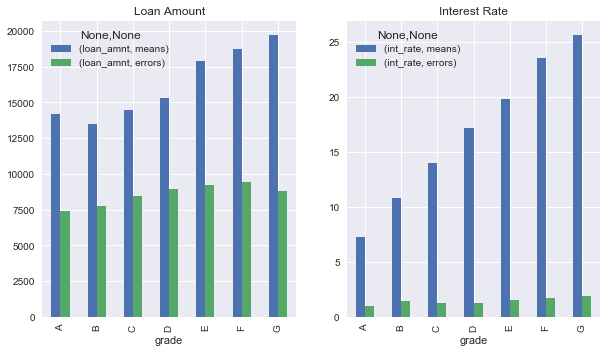

In [422]:

trace1=df5.groupby(['grade'])['loan_amnt'].aggregate({'loan_amnt':[np.mean,lambda x: np.std(x, ddof=1)]}).rename(columns={'mean':"means",'<lambda>':'errors'})
trace2=df5.groupby(['grade'])['int_rate'].aggregate({'int_rate':[np.mean,lambda x: np.std(x, ddof=1)]}).rename(columns={'mean':"means",'<lambda>':'errors'})



trace1.rename(columns={'mean': 'means', '<lambda>': 'errors'}, inplace=True)
trace2.rename(columns={'mean': 'means', '<lambda>': 'errors'}, inplace=True)

plt.figure(1)
plt.subplot(2,2,1)
trace1.plot.bar(ax=plt.gca(),title='Loan Amount',figsize=(10,12))
plt.subplot(2,2,2)
trace2.plot.bar(ax=plt.gca(),title='Interest Rate',figsize=(10,12))





array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027699CCE470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002769E59D0B8>], dtype=object)

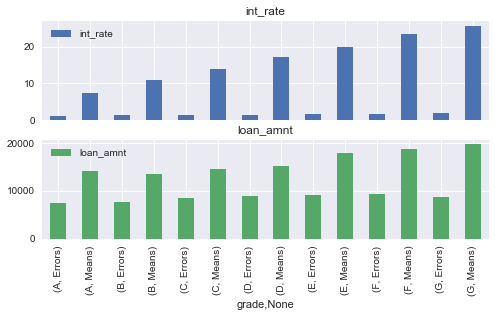

In [423]:
vis = df5.groupby('grade')[['loan_amnt','int_rate']]
means=vis.mean()
errors=vis.std(ddof=1)

vis1=pd.concat({"Means":means,"Errors":errors},axis=1)

vis2=vis1.stack(level=0)
vis2.head()




vis2.plot.bar(subplots=True, figsize=(8, 4))



2.2.2 Plot the histograms of "loan_amnt" under different types of "term" in one plot

term
36    Axes(0.125,0.125;0.775x0.755)
60    Axes(0.125,0.125;0.775x0.755)
Name: loan_amnt, dtype: object

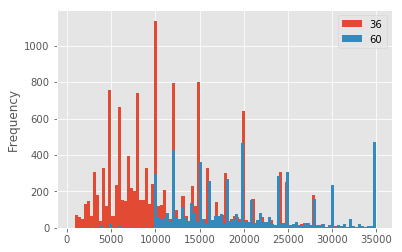

In [194]:
x = df5.groupby(['term'])['loan_amnt']
plt.figure()
x.plot.hist(bins=100,legend=True)


2.2.3 Making a plot that shows the number of loans in each month (based on column "issue_d"). Meanwhile, plotting the total amount of loans in each month on the secondary y axis.

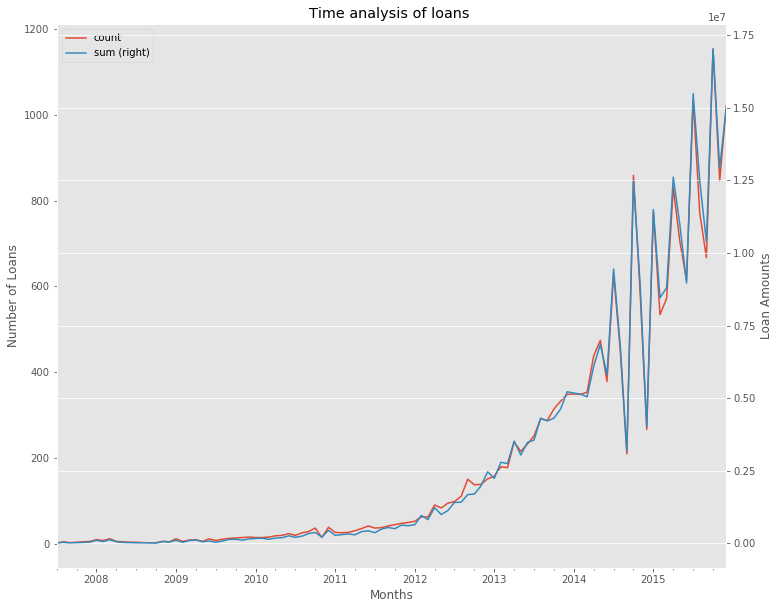

In [190]:

per = df5.issue_d.dt.to_period("M")  
g = df5.loan_amnt.groupby(per)
dfsum=pd.DataFrame(g.sum())
dfcount=pd.DataFrame(g.count())
visdf=pd.concat({'sum':dfsum,'count': dfcount},axis=1)

visdf.columns = visdf.columns.droplevel(1)

plt.figure()
ax = visdf[['count','sum']].plot(secondary_y = ['sum'], figsize = (12,10))
ax.set_ylabel('Number of Loans')
ax.right_ax.set_ylabel('Loan Amounts')
ax.set_xlabel('Months')
ax.set_title("Time analysis of loans ")
